In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Get the data

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Dealing with the data

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
df.duplicated().sum().sum()

0

In [9]:
df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
df1 = df.drop(['customer','effective_to_date'],axis = 1)

In [12]:
df1.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
df1.shape

(9134, 22)

## Explore the data

Text(0.5, 1.0, 'Total number of responses')

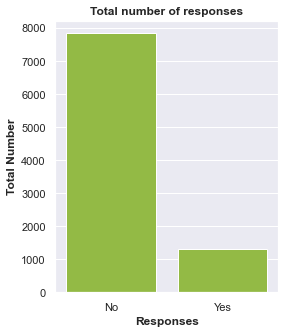

In [14]:
# plot of the total number of responses

a = df1['response'].value_counts()
plt.figure(figsize = (4,5))
sns.set(style='darkgrid')
plot1 = sns.barplot(data = df1, x = a.index, y= a,color="yellowgreen")
plt.xlabel("Responses", weight = 'bold',size = 12)
plt.ylabel("Total Number", weight = 'bold',size = 12)
plt.title("Total number of responses",weight = 'bold',size = 12)

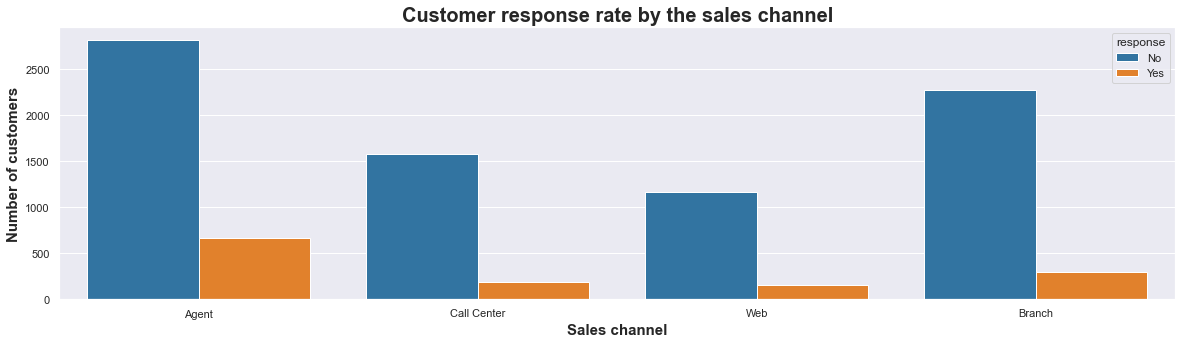

In [15]:
# Customer response rate by the sales channel

plt.figure(figsize=(20, 5))
sns.set(style='darkgrid')
color = ['green','red']
plot2 = sns.countplot(data = df1,x='sales_channel', hue = 'response', palette='tab10')
plt.title('Customer response rate by the sales channel',weight='bold',size = 20)
plt.xlabel('Sales channel', weight='bold',size = 15)
plt.ylabel('Number of customers', weight='bold',size = 15)
plt.show()

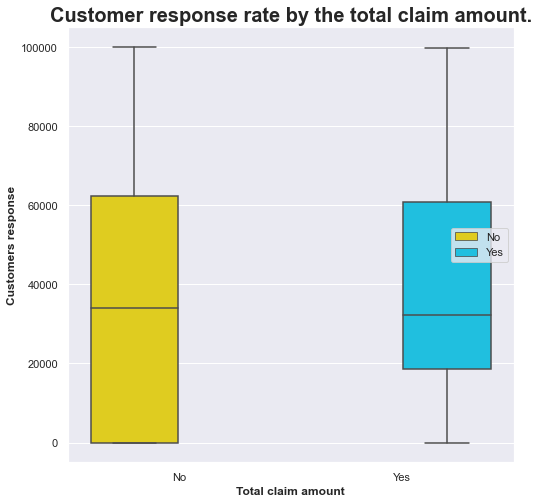

In [16]:
# plot of the response rate by income
plt.figure(figsize=(8,8))
plot5 = sns.boxplot(data=df1, y = 'income', x = 'response', hue = 'response',palette='jet_r')
plt.title('Customer response rate by the total claim amount.', weight ='bold',fontsize = 20)
plt.xlabel('Total claim amount', weight='bold',fontsize = 12)
plt.ylabel('Customers response', weight='bold',fontsize = 12)
plt.legend(markerscale=2)

## Modeling

### x-y split

In [17]:
df1.shape

(9134, 22)

In [18]:
x = df1.drop('total_claim_amount', axis =1)
y = df['total_claim_amount']

In [19]:
x.head(2)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [20]:
y.head(2)

0     384.811147
1    1131.464935
Name: total_claim_amount, dtype: float64

In [21]:
catCols = x[x.select_dtypes("object").columns]
catCols.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [22]:
catCols.shape

(9134, 14)

In [23]:
numCols = x[x.select_dtypes("number").columns]
numCols.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8


In [24]:
numCols.shape

(9134, 7)

#### Checking for multicollinearity

In [36]:
a = round(numCols.corr(),2)
a

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00


<AxesSubplot:>

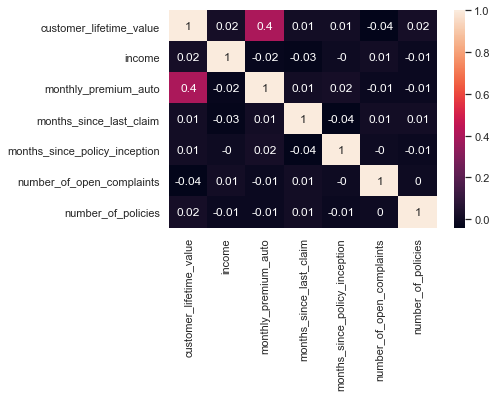

In [37]:
sns.heatmap(a,annot = True)

 - **No multicolinarity is observed.**

### Normalize (numerical)

In [ ]:
transformer = MinMaxScaler().fit(numCols)
x_minmax = transformer.transform(numCols)
x_minmax.shape

In [ ]:
minmax_df = pd.DataFrame(x_minmax,columns = numCols.columns)

In [ ]:
minmax_df.head(2)

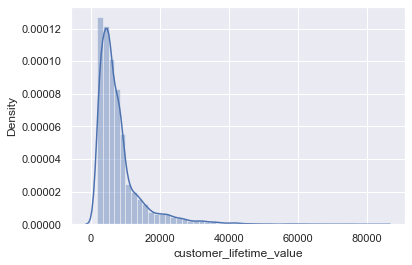

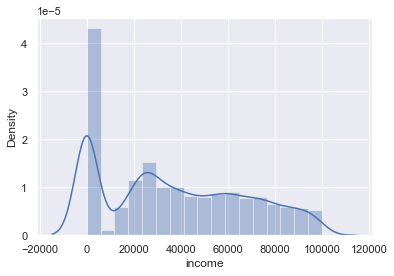

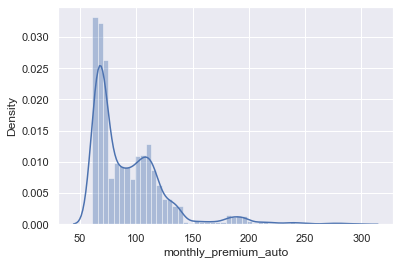

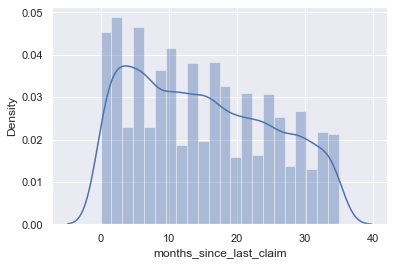

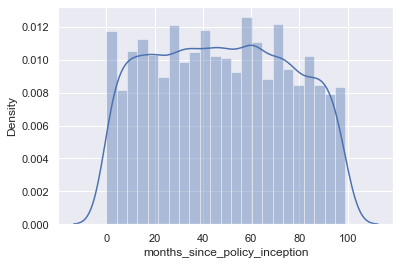

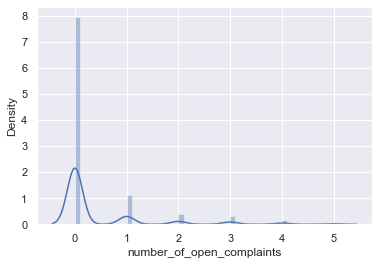

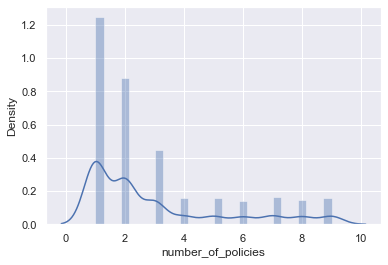

In [39]:
for column in numCols.columns:
    sns.distplot(numCols[column])  # takes to see the distribution
    plt.show()

In [43]:
std = StandardScaler().fit(numCols)
num_std = std.transform(numCols)


In [44]:
num_std = pd.DataFrame(num_std, columns=numCols.columns)
num_std.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


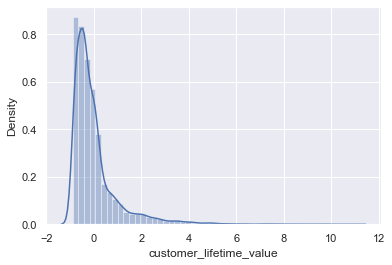

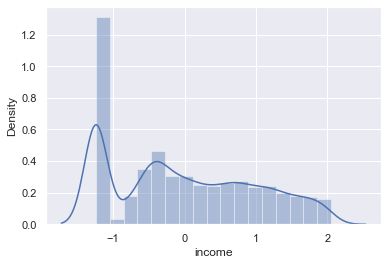

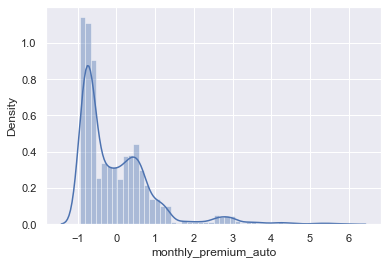

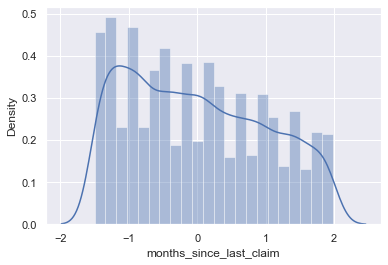

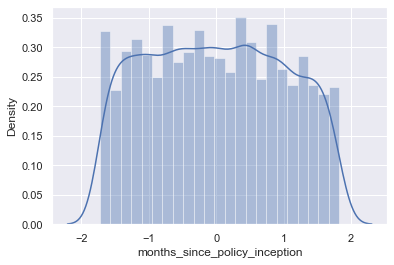

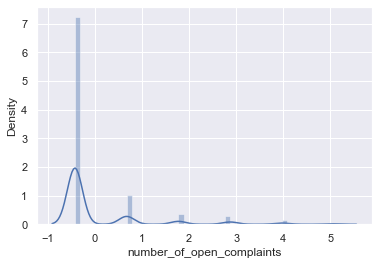

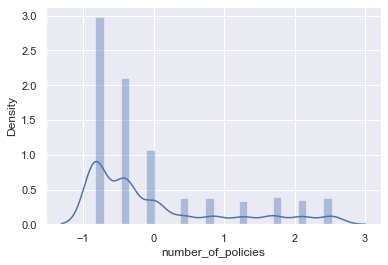

In [45]:
for column in num_std.columns:
    sns.distplot(num_std[column])  # takes to see the distribution
    plt.show()

### One Hot/Label Encoding (categorical)

In [46]:
x_dum = pd.get_dummies(catCols, drop_first = True)
x_dum

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Concat DataFrames

In [48]:
concat_df = pd.concat([num_std,x_dum], axis = 1)

In [49]:
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Linear Regression

#### Train-Test Split

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(concat_df,y,test_size = 0.2, random_state = 55)

In [51]:
xtrain.shape

(7307, 50)

In [52]:
xtest.shape

(1827, 50)

#### Apply linear regression

In [53]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [54]:
pred = lm.predict(xtest)

In [55]:
pred

array([353.05352396, 652.83725975,   2.37311402, ..., 591.94986771,
       518.12170342, 756.81233933])

In [56]:
ytest

922     360.055890
3230    698.400000
5454    172.226165
1233    345.211703
8915      3.406136
           ...    
1087    326.400000
8741     32.454659
6117    542.400000
4593    468.000000
3927    813.600000
Name: total_claim_amount, Length: 1827, dtype: float64

#### Model Validation

In [57]:
# R2 Score
r2 = r2_score(ytest, pred)
r2

0.7811109933950887

In [58]:
# MSE
MSE = mean_squared_error(ytest,pred)
MSE

19179.898974172178

In [59]:
# RMSE
RMSE = mean_squared_error(ytest,pred,squared=False)
RMSE

138.49151228206074

In [60]:
#MAE
MAE = mean_absolute_error(ytest,pred)
MAE

92.79727180431705